In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_excel('Walmart Sales.xlsx')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [9]:
df.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


In [11]:
df.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

**Solution for A**

we can group the data by city and branch, and then calculate relevant metrics such as total revenue, average revenue per order, and order count. This will give us insights into the performance of each location

In [31]:
df['revenue'] = df['Unit price'] * df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [33]:
city_branch = df.groupby(['City', 'Branch'])


In [44]:
city_branch_totalRevenue  = city_branch['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
city_branch_totalRevenue


,City,Branch,revenue
1,Mandalay,B,37215.93
3,Naypyitaw,A,35985.64
7,Yangon,B,35193.51
4,Naypyitaw,B,35157.75
5,Naypyitaw,C,34160.14
0,Mandalay,A,34130.09
6,Yangon,A,33647.27
8,Yangon,C,32302.43
2,Mandalay,C,29794.62


In [48]:
pivot_df = city_branch_totalRevenue.pivot(index='City', columns='Branch', values='revenue')
pivot_df
'''Pivoting the dataframe to have city and branch as columns'''

Branch,A,B,C
City,,,
Mandalay,34130.09,37215.93,29794.62
Naypyitaw,35985.64,35157.75,34160.14
Yangon,33647.27,35193.51,32302.43


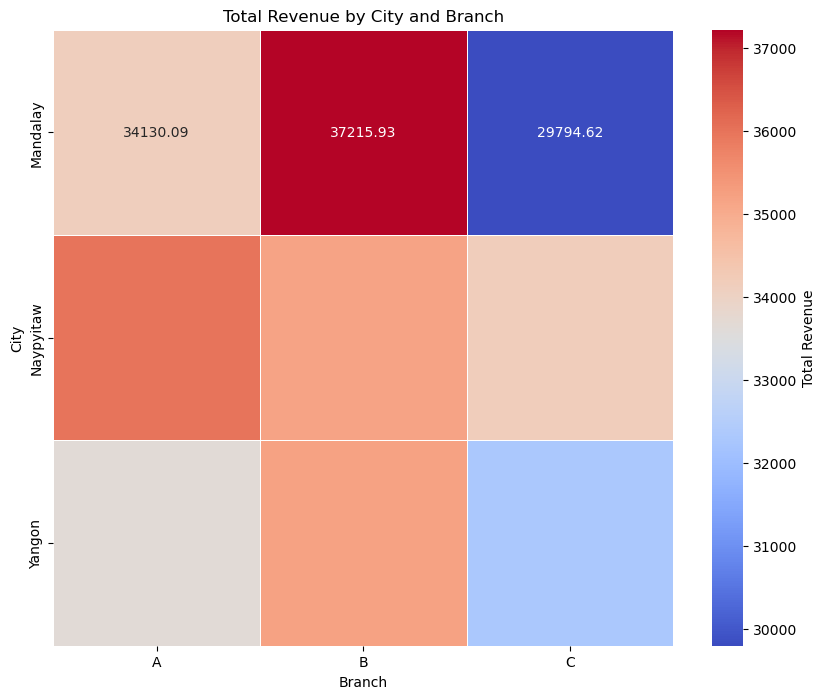

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Total Revenue'})
plt.title('Total Revenue by City and Branch')
plt.xlabel('Branch')
plt.ylabel('City')

plt.show()

As you can see the city Mandalay with Branch B has the highest total revenue.

**Solution for second B**

Average price of an item sold at each branch in each city can be calculated in two steps:

1- Group the data by city and branch columns 
2- Calculate the average unit price for each group using the aggregate function such as mean.

we have already grouped the data above now the drill is simple.

In [54]:
city_branch_averagePrice =  city_branch['Unit price'].mean()
city_branch_averagePrice

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64

In [61]:
pivot_df_avgPrice = city_branch_averagePrice.reset_index().pivot(index='City', columns='Branch', values='Unit price')
pivot_df_avgPrice

Branch,A,B,C
City,,,
Mandalay,53.353866,56.133305,57.958316
Naypyitaw,54.123182,57.785688,57.941009
Yangon,55.639298,56.011062,52.684602


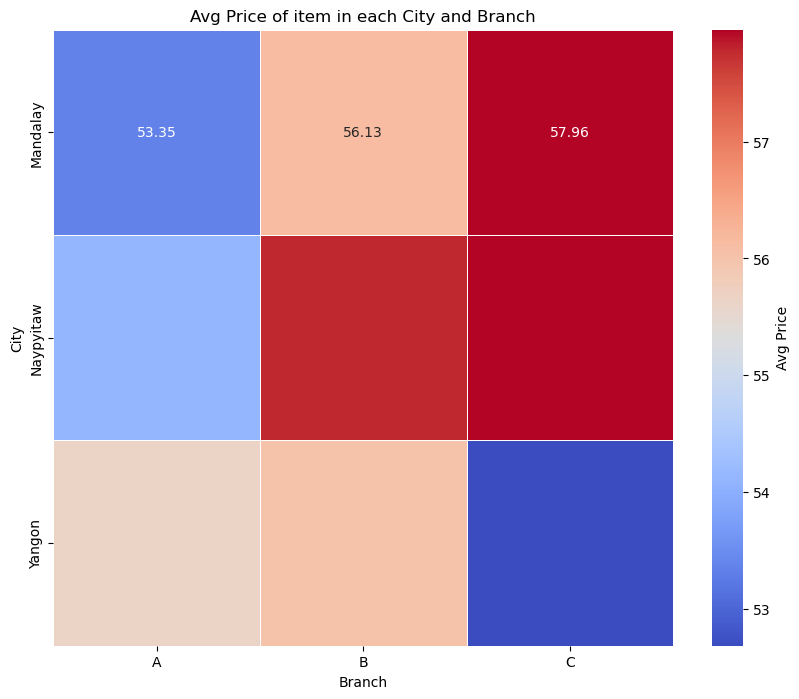

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df_avgPrice, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Avg Price'})
plt.title('Avg Price of item in each City and Branch')
plt.xlabel('Branch')
plt.ylabel('City')

plt.show()

C branch of Mandalay has the highest average price of an item being sold, whereas C branch of yangon being the lowest

**Solution for C**

To analyze the performance of sales and revenue month over month across the product line, gender, and payment method, and identify focus areas for better sales in April 2019, let me outline the whole process:

1. Convert the 'Date' column to datetime format and extract the month and year.
2. Group the data by 'Product line', 'Gender', 'Payment', and 'Month-Year'.
3. Calculate the total revenue and order count for each group.
4. Analyze the Month over Month (MoM) changes in revenue and order count.
5. Identify the focus areas for April 2019 based on the MoM trends.


In [66]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')


df['month-year'] = df['Date'].dt.strftime('%Y-%m')

# Group the data by 'Product line', 'Gender', 'Payment', and 'Month-Year'
groupedMoM = df.groupby(['Product line', 'Gender', 'Payment', 'month-year'])


In [86]:

revenueMoM = groupedMoM['revenue'].sum()
revenueMoM

Product line            Gender  Payment      month-year
Electronic accessories  Female  Cash         2019-01       2731.86
                                             2019-02       5189.16
                                             2019-03       2759.66
                                Credit card  2019-01       3045.42
                                             2019-02       2542.08
                                                            ...   
Sports and travel       Male    Credit card  2019-02       1466.00
                                             2019-03       3633.90
                                Ewallet      2019-01       1814.55
                                             2019-02       1327.05
                                             2019-03       4930.61
Name: revenue, Length: 108, dtype: float64

In [84]:
order_count = groupedMoM.size()
order_count

Product line            Gender  Payment      month-year
Electronic accessories  Female  Cash         2019-01        9
                                             2019-02       17
                                             2019-03       12
                                Credit card  2019-01        7
                                             2019-02        7
                                                           ..
Sports and travel       Male    Credit card  2019-02        6
                                             2019-03        8
                                Ewallet      2019-01       10
                                             2019-02        3
                                             2019-03       14
Length: 108, dtype: int64

In [90]:
'''Combine revenue and order count into a single DataFrame'''
overAll_performance = pd.DataFrame({'Revenue': revenueMoM, 'Order Count': order_count})
overAll_performance.sort_values(by='Revenue',ascending=False)


Revenue  Order Count
Product line           Gender Payment     month-year                      
Home and lifestyle     Female Ewallet     2019-03     6538.18           17
Sports and travel      Female Cash        2019-01     5206.46           17
Food and beverages     Female Cash        2019-01     5197.05           12
Electronic accessories Female Cash        2019-02     5189.16           17
                       Male   Ewallet     2019-01     4951.86           13
...                                                       ...          ...
Sports and travel      Male   Ewallet     2019-02     1327.05            3
Home and lifestyle     Male   Credit card 2019-01     1131.21            6
Health and beauty      Female Cash        2019-01      878.27            6
Home and lifestyle     Male   Credit card 2019-02      839.81            2
Electronic accessories Male   Credit card 2019-03      658.81            4

[108 rows x 2 columns]

In [96]:
overAll_performance['Revenue MoM Change'] = overAll_performance.groupby(['Product line', 'Gender', 'Payment'])['Revenue'].pct_change()
overAll_performance.sort_values(by='Revenue MoM Change',ascending=False)

Revenue  Order Count  \
Product line       Gender Payment     month-year                         
Health and beauty  Female Cash        2019-02     4218.83           10   
Home and lifestyle Female Ewallet     2019-03     6538.18           17   
Sports and travel  Male   Ewallet     2019-03     4930.61           14   
Health and beauty  Male   Cash        2019-03     4578.92           14   
Home and lifestyle Male   Credit card 2019-03     2288.37           11   
...                                                   ...          ...   
Sports and travel  Female Credit card 2019-01     3570.03           13   
                          Ewallet     2019-01     2044.82            8   
                   Male   Cash        2019-01     4407.54           11   
                          Credit card 2019-01     3591.86           11   
                          Ewallet     2019-01     1814.55           10   

                                                  Revenue MoM Change  
Product line       Gender Payment     month-year                      
Health and beauty  Female Cash        2019-02               3.803568  
Home and lifestyle Female Ewallet     2019-03               3.298634  
Sports and travel  Male   Ewallet     2019-03               2.715467  
Health and beauty  Male   Cash        2019-03               2.255357  
Home and lifestyle Male   Credit card 2019-03               1.724866  
...                                                              ...  
Sports and travel  Female Credit card 2019-01                    NaN  
                          Ewallet     2019-01                    NaN  
                   Male   Cash        2019-01                    NaN  
                          Credit card 2019-01                    NaN  
                          Ewallet     2019-01                    NaN  

[108 rows x 3 columns]

In [99]:
overAll_performance['Order Count'].describe()

count    108.000000
mean       9.259259
std        2.949324
min        2.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       17.000000
Name: Order Count, dtype: float64

In [101]:
overAll_performance['Order Count Monthly Change'] = overAll_performance['Order Count'].pct_change()
overAll_performance

Revenue  Order Count  \
Product line           Gender Payment     month-year                         
Electronic accessories Female Cash        2019-01     2731.86            9   
                                          2019-02     5189.16           17   
                                          2019-03     2759.66           12   
                              Credit card 2019-01     3045.42            7   
                                          2019-02     2542.08            7   
...                                                       ...          ...   
Sports and travel      Male   Credit card 2019-02     1466.00            6   
                                          2019-03     3633.90            8   
                              Ewallet     2019-01     1814.55           10   
                                          2019-02     1327.05            3   
                                          2019-03     4930.61           14   

                                                      Revenue MoM Change  \
Product line           Gender Payment     month-year                       
Electronic accessories Female Cash        2019-01                    NaN   
                                          2019-02               0.899497   
                                          2019-03              -0.468188   
                              Credit card 2019-01                    NaN   
                                          2019-02              -0.165278   
...                                                                  ...   
Sports and travel      Male   Credit card 2019-02              -0.591855   
                                          2019-03               1.478786   
                              Ewallet     2019-01                    NaN   
                                          2019-02              -0.268662   
                                          2019-03               2.715467   

                                                      Order Count Monthly Change  
Product line           Gender Payment     month-year                              
Electronic accessories Female Cash        2019-01                            NaN  
                                          2019-02                       0.888889  
                                          2019-03                      -0.294118  
                              Credit card 2019-01                      -0.416667  
                                          2019-02                       0.000000  
...                                                                          ...  
Sports and travel      Male   Credit card 2019-02                      -0.454545  
                                          2019-03                       0.333333  
                              Ewallet     2019-01                       0.250000  
                                          2019-02                      -0.700000  
                                          2019-03                       3.666667  

[108 rows x 4 columns]

Now we can safely draw the conclusion that catering females would be the highest profitable buisness with Product Line Health and Beauty being on the top but the question was which areas we should be putting are focus on to improve the sales for the Month of April, for improving the sales we need to find out the weaker segments, then we can decide to either do alteration on top of it or eradicate the products from the store.

In [108]:
overAll_performance['Revenue'].describe()

count     108.000000
mean     2848.031296
std      1111.172933
min       658.810000
25%      2002.912500
50%      2718.585000
75%      3596.502500
max      6538.180000
Name: Revenue, dtype: float64

In [116]:
df_momChange = overAll_performance[(overAll_performance['Revenue MoM Change']< 0) | (overAll_performance['Order Count Monthly Change']<0) ]
df_momChange.head(10)

Revenue  Order Count  \
Product line           Gender Payment     month-year                         
Electronic accessories Female Cash        2019-03     2759.66           12   
                              Credit card 2019-01     3045.42            7   
                                          2019-02     2542.08            7   
                              Ewallet     2019-01     1576.48            7   
                                          2019-03     2518.46            6   
                       Male   Cash        2019-02     1590.25            8   
                              Credit card 2019-01     2248.65            8   
                                          2019-03      658.81            4   
                              Ewallet     2019-02     1673.69            7   
Fashion accessories    Female Cash        2019-01     3845.24           12   

                                                      Revenue MoM Change  \
Product line           Gender Payment     month-year                       
Electronic accessories Female Cash        2019-03              -0.468188   
                              Credit card 2019-01                    NaN   
                                          2019-02              -0.165278   
                              Ewallet     2019-01                    NaN   
                                          2019-03               0.051360   
                       Male   Cash        2019-02              -0.529552   
                              Credit card 2019-01                    NaN   
                                          2019-03              -0.790554   
                              Ewallet     2019-02              -0.662008   
Fashion accessories    Female Cash        2019-01                    NaN   

                                                      Order Count Monthly Change  
Product line           Gender Payment     month-year                              
Electronic accessories Female Cash        2019-03                      -0.294118  
                              Credit card 2019-01                      -0.416667  
                                          2019-02                       0.000000  
                              Ewallet     2019-01                      -0.416667  
                                          2019-03                      -0.142857  
                       Male   Cash        2019-02                      -0.200000  
                              Credit card 2019-01                      -0.466667  
                                          2019-03                      -0.500000  
                              Ewallet     2019-02                      -0.461538  
Fashion accessories    Female Cash        2019-01                      -0.076923

In [118]:
df_momChange[df_momChange['Revenue']<2002]

Revenue  Order Count  \
Product line           Gender Payment     month-year                         
Electronic accessories Female Ewallet     2019-01     1576.48            7   
                       Male   Cash        2019-02     1590.25            8   
                              Credit card 2019-03      658.81            4   
                              Ewallet     2019-02     1673.69            7   
Fashion accessories    Female Cash        2019-03     1445.19            5   
                       Male   Cash        2019-01     1459.32            7   
                              Credit card 2019-03     1631.35            7   
Food and beverages     Male   Cash        2019-01     1927.02           10   
                                          2019-03     1779.42            6   
                              Credit card 2019-03     1611.44            8   
Health and beauty      Female Cash        2019-01      878.27            6   
                                          2019-03     1555.04            6   
                              Credit card 2019-02     1792.37            6   
                                          2019-03     1767.17            6   
                              Ewallet     2019-02     1344.95            8   
                                          2019-03     1874.93            7   
                       Male   Cash        2019-02     1406.58            5   
Home and lifestyle     Female Ewallet     2019-02     1520.99            3   
                       Male   Credit card 2019-01     1131.21            6   
                                          2019-02      839.81            2   
Sports and travel      Female Cash        2019-03     1799.53            6   
                              Credit card 2019-02     1842.21            6   
                       Male   Credit card 2019-02     1466.00            6   
                              Ewallet     2019-02     1327.05            3   

                                                      Revenue MoM Change  \
Product line           Gender Payment     month-year                       
Electronic accessories Female Ewallet     2019-01                    NaN   
                       Male   Cash        2019-02              -0.529552   
                              Credit card 2019-03              -0.790554   
                              Ewallet     2019-02              -0.662008   
Fashion accessories    Female Cash        2019-03              -0.597998   
                       Male   Cash        2019-01                    NaN   
                              Credit card 2019-03              -0.350179   
Food and beverages     Male   Cash        2019-01                    NaN   
                                          2019-03              -0.250540   
                              Credit card 2019-03              -0.522884   
Health and beauty      Female Cash        2019-01                    NaN   
                                          2019-03              -0.631405   
                              Credit card 2019-02               0.010127   
                                          2019-03              -0.014060   
                              Ewallet     2019-02              -0.455744   
                                          2019-03               0.394052   
                       Male   Cash        2019-02              -0.623198   
Home and lifestyle     Female Ewallet     2019-02              -0.436267   
                       Male   Credit card 2019-01                    NaN   
                                          2019-02              -0.257600   
Sports and travel      Female Cash        2019-03              -0.265237   
                              Credit card 2019-02              -0.483979   
                       Male   Credit card 2019-02              -0.591855   
                              Ewallet     2019-02              -0.268662   

                                                

Above data frame represents the focus areas for April 2019, with negative month on month change of revenve and order count, also to pick even weaker segment on top of it I pulled the rows with revenue less that 25 percentile.